In [1]:
pwd

'C:\\Users\\yokes\\Desktop'

In [2]:
import os

In [5]:
os.chdir('C:\\Users\\yokes\\Downloads')

In [6]:
pwd

'C:\\Users\\yokes\\Downloads'

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("Churn_Modelling.csv")

In [11]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 2. LOAD THE DATASET

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#  3. VISUALIZATION

In [14]:
import matplotlib.pyplot as plt

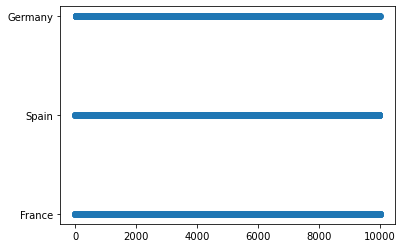

In [22]:
plt.scatter(df.index,df['Geography'])
plt.show()

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

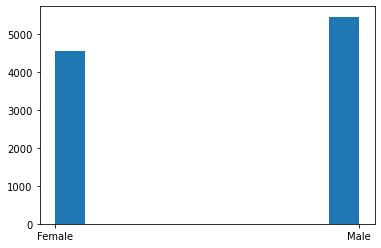

In [20]:
plt.hist(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Balance'>

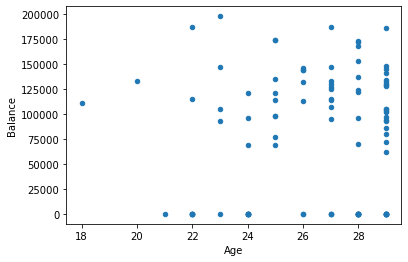

In [42]:
df[df['Age'] < 30].sample(100).plot.scatter(x='Age', y='Balance')

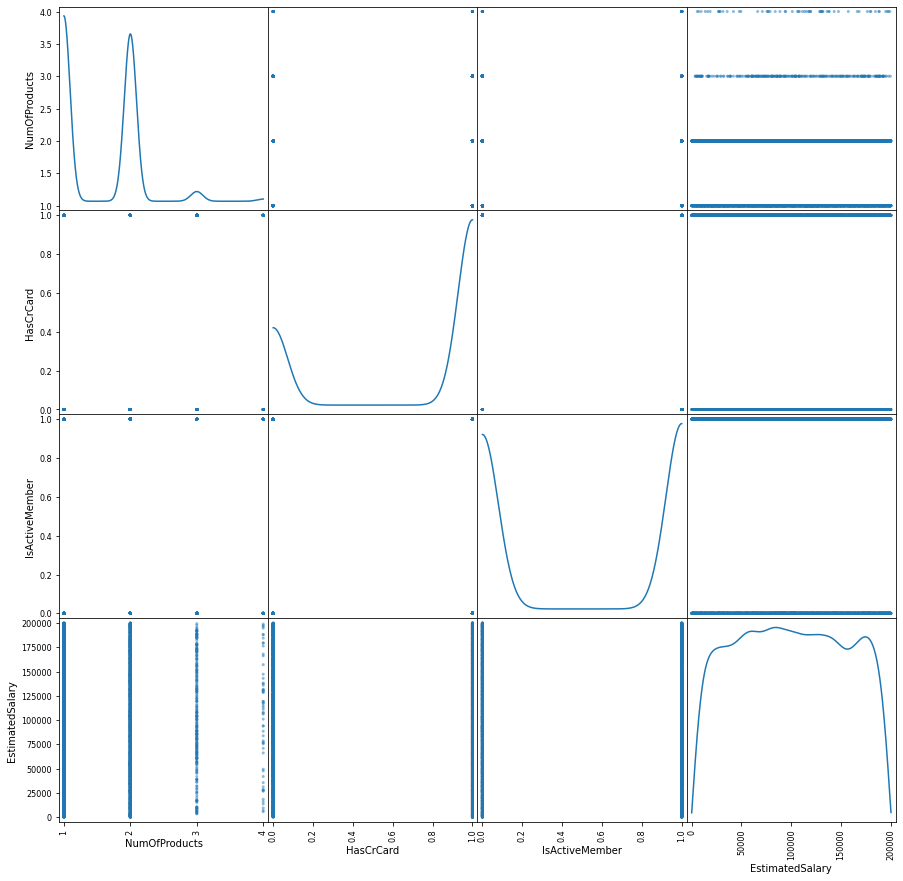

In [43]:
pd.plotting.scatter_matrix(df.loc[:, "NumOfProducts":"EstimatedSalary"], diagonal="kde",figsize=(15,15))
plt.show()

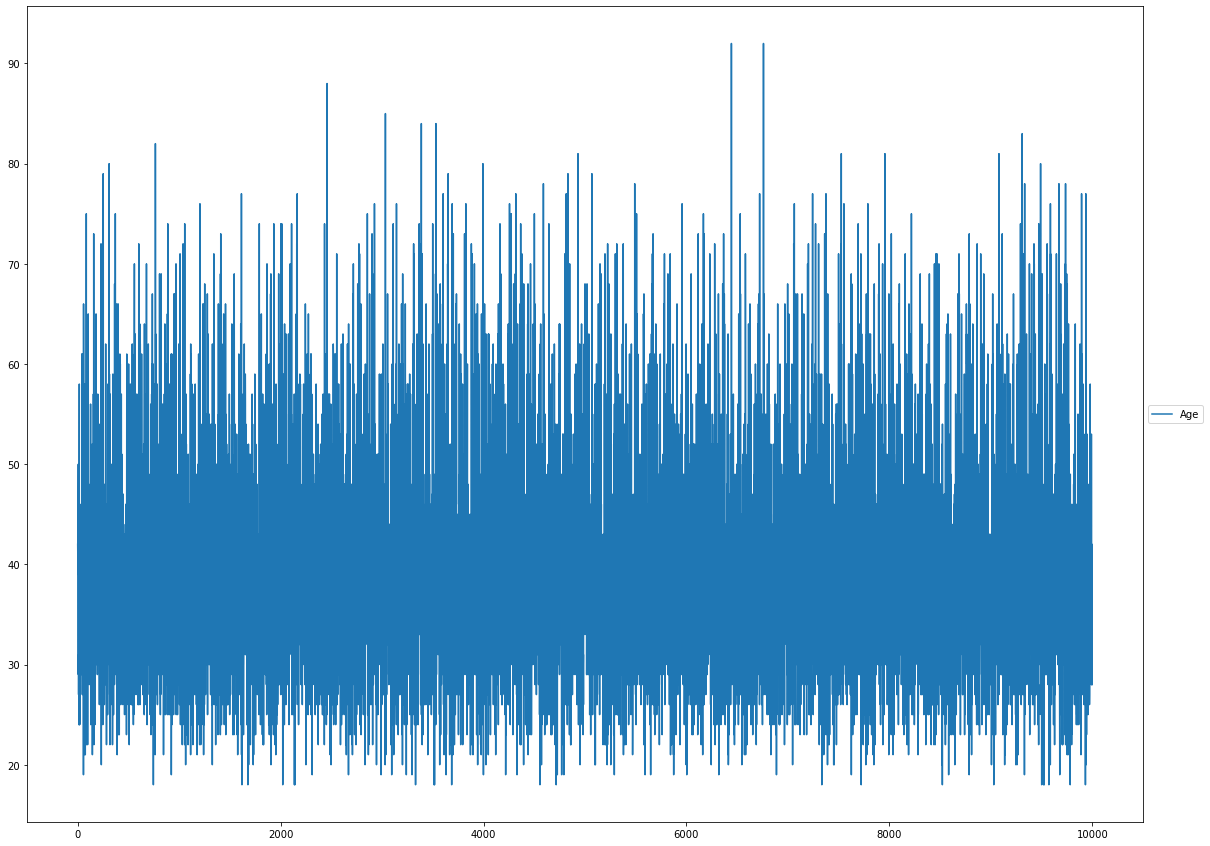

In [46]:
ax = df[["Gender","Age"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

#  4. Perform descriptive statistics on the dataset

In [47]:
import numpy as np
print(df['Balance'].mean())

76485.88928799961


In [48]:
print(df['Balance'].sum())

764858892.8800001


# 5.Handling The Missing Values

In [51]:
missing_values_count = df.isnull().sum()
missing_values_count

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#  6. Find the outliers and replace the outliers

In [53]:
median = float(df['Tenure'].median())
print(median)

5.0


#  7. Check for Categorical columns and perform encoding

In [54]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,5.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [55]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,5.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,5.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4.0,130142.79,1,1,0,38190.78,0


# 8. Split the data into dependent and independent variables

# Independent variables

In [56]:
X = df.iloc[:, :-1].values
print(X)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


# Dependent variables

In [58]:
Y = df.iloc[:, -1].values
print(Y)

[1 0 1 ... 1 1 0]


#  9. Scale the independent variables

In [62]:
from sklearn.preprocessing import MinMaxScaler
df[["Age", "Tenure"]] = MinMaxScaler().fit_transform(df[["Age", "Tenure"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave          619    France  Female   
1             2    15647311       Hill          608     Spain  Female   
2             3    15619304       Onio          502    France  Female   
3             4    15701354       Boni          699    France  Female   
4             5    15737888   Mitchell          850     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku          771    France    Male   
9996       9997    15569892  Johnstone          516    France    Male   
9997       9998    15584532        Liu          709    France  Female   
9998       9999    15682355  Sabbatini          772   Germany    Male   
9999      10000    15628319     Walker          792    France  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324     0.4       0.00           

# 10. Split the data into training and testing

In [63]:
training_data = df.sample(frac=0.5, random_state=10)
print(training_data)

      RowNumber  CustomerId       Surname  CreditScore Geography  Gender  \
937         938    15662100           Hsu          850   Germany  Female   
9355       9356    15621870       Hawkins          739     Spain  Female   
2293       2294    15801265          Tang          689     Spain  Female   
192         193    15756850     Golovanov          479    France    Male   
8675       8676    15639265        Isaacs          714    France    Male   
...         ...         ...           ...          ...       ...     ...   
1274       1275    15625916         Chien          562     Spain    Male   
1225       1226    15733387          Pham          707     Spain  Female   
8411       8412    15719479  Chukwuhaenye          619     Spain  Female   
6320       6321    15673599    Williamson          618     Spain    Male   
658         659    15568595       Fleming          544    France    Male   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
937   0.

In [64]:
testing_data = df.drop(training_data.index)
print(testing_data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
1             2    15647311       Hill          608     Spain  Female   
2             3    15619304       Onio          502    France  Female   
3             4    15701354       Boni          699    France  Female   
9            10    15592389         H?          684    France    Male   
10           11    15767821     Bearce          528    France    Male   
...         ...         ...        ...          ...       ...     ...   
9994       9995    15719294       Wood          800    France  Female   
9995       9996    15606229   Obijiaku          771    France    Male   
9996       9997    15569892  Johnstone          516    France    Male   
9997       9998    15584532        Liu          709    France  Female   
9999      10000    15628319     Walker          792    France  Female   

           Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1     0.310811     0.2   83807.86           